In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import wrangle as w
import model as m

In [2]:
#wrangle data, prep model_df with dummy_cols, split into train/validate/test
df = w.wrangle_wildlife_strike_df()
model_df = w.prep_w_strike_df_for_modeling(df)
train, validate, test = w.split_function(model_df, 'damage_level')

cached csv file found and read
Prepared df: (279942, 41)

Train: (167964, 41)
Validate: (55989, 41)
Test: (55989, 41)


In [3]:
# split into X, y for modeling
X_train, X_validate, X_test, y_train, y_validate, y_test, baseline_accuracy = m.get_X_y_baseline(train
                                                                                                 , validate
                                                                                                 , test
                                                                                                 , 'damage_level')

In [4]:
# Probably will be hard to beat .95 !!
baseline_accuracy

0.954037769998333

In [15]:
results_df = m.get_multi_logit_scores(X_train, X_validate, y_train, y_validate)

In [13]:
results_df.columns = list(results_df.iloc[0])
results_df = results_df.iloc[1:]

In [16]:
results_df

,C,train_acc,val_acc,coef_ac_mass,coef_num_engs,coef_size_of_species_Medium,coef_size_of_species_Small,coef_size_of_species_Unknown,coef_ac_class_B,coef_ac_class_C,...,"coef_precipitation_Fog, Rain, Snow","coef_precipitation_Fog, Snow",coef_precipitation_None,"coef_precipitation_None, Rain","coef_precipitation_None, Rain, Snow","coef_precipitation_None, Snow",coef_precipitation_Rain,"coef_precipitation_Rain, Snow",coef_precipitation_Snow,coef_precipitation_Unknown
0,0.01,0.954038,0.954009,-0.276819,-0.067325,-0.075156,-0.139176,-0.018314,0.019061,-0.000094,...,-0.000011,-0.000022,-0.02281,-0.000034,-0.000008,-0.000087,-0.015573,-0.000063,-0.001072,0.032972
0,0.1,0.953865,0.954009,-0.485317,-0.183391,-0.463481,-0.761298,-0.264554,0.062558,-0.004075,...,-0.000089,-0.000183,-0.302534,-0.001506,-0.000127,-0.002835,-0.197119,-0.001341,-0.01713,0.062697
0,1.0,0.953835,0.953937,-0.50084,-0.309854,-0.701183,-1.190424,-0.38403,0.073634,-0.005702,...,-0.000115,-0.000249,-0.688042,-0.002368,-0.000175,-0.004897,-0.304668,-0.001938,-0.025622,-0.038018
0,10.0,0.953829,0.953937,-0.483445,-0.366335,-0.776588,-1.36462,-0.496573,0.08916,-0.007821,...,-0.000148,-0.000317,-0.684813,-0.003175,-0.000218,-0.006148,-0.376429,-0.002521,-0.032872,-0.043154
0,100.0,0.953835,0.953937,-0.512524,-0.324139,-0.727457,-1.231445,-0.372721,0.073766,-0.005409,...,-0.000112,-0.000244,-0.768673,-0.002326,-0.000173,-0.004922,-0.30585,-0.001878,-0.025283,-0.02674
0,1000.0,0.953817,0.953937,-0.491085,-0.309788,-0.728125,-1.23181,-0.366584,0.074017,-0.00532,...,-0.00011,-0.000241,-0.778298,-0.002287,-0.000171,-0.004885,-0.303764,-0.001853,-0.024958,-0.016115


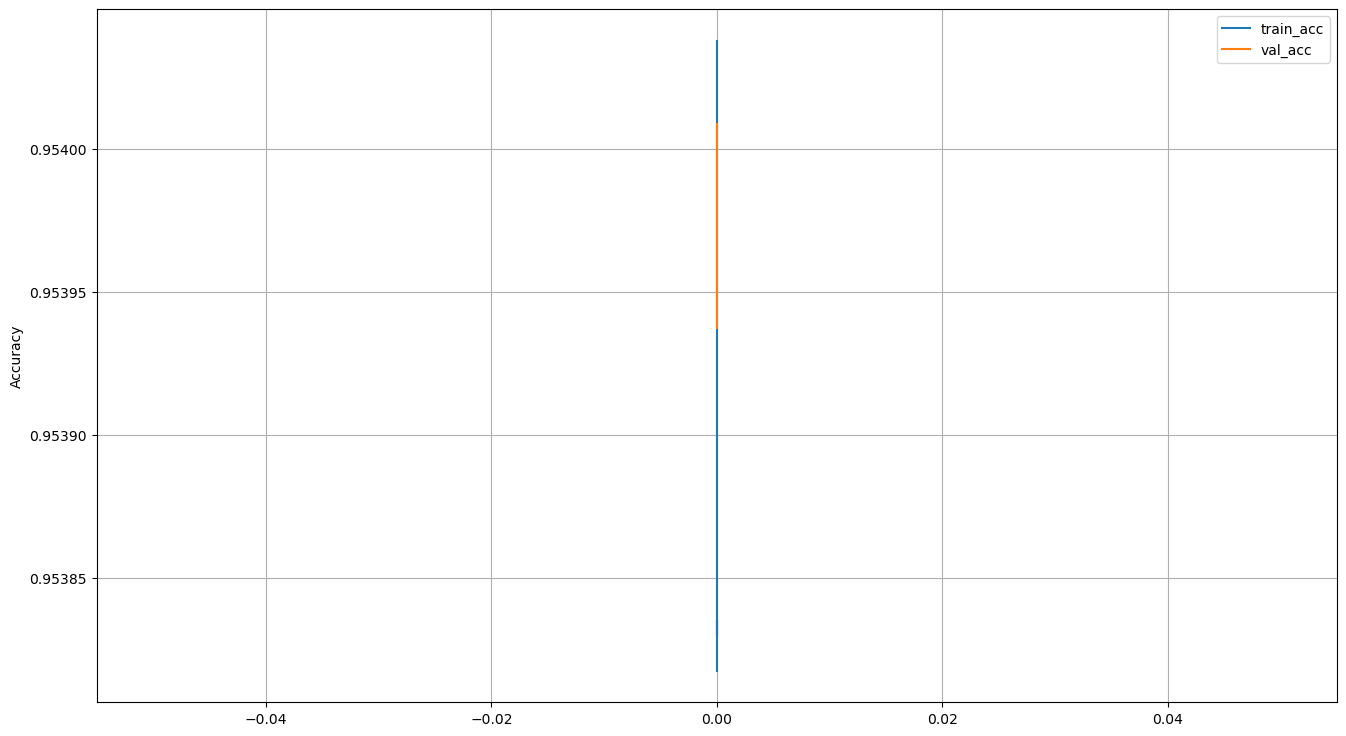

In [18]:
# plot the score
results_df[['train_acc','val_acc']].plot(figsize = (16,9))
# results_df.plot(figsize = (16,9))
plt.ylabel('Accuracy')
# plt.xticks(np.arange(0,21,1))
plt.grid()